In [1]:
from __future__ import print_function, unicode_literals
import os
import jieba
filepath="data/zh_dic.txt"

if os.path.isfile(filepath):
    jieba.load_userdict(filepath)
import jieba.posseg as pseg

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_y/yxtl0q3x3qq4r0f00gk36xjw0000gn/T/jieba.cache
Loading model cost 0.406 seconds.
Prefix dict has been built succesfully.


In [2]:
test_sent = (
"李小福是創新辦主任也是雲計算方面的專家; 什麼是八一雙鹿\n"
"例如我輸入一個帶「韓玉賞鑒」的標題，在自定義詞庫中也增加了此詞為N類\n"
"「台中」正確應該不會被切開。mac上可分出「石墨烯」；此時又可以分出來凱特琳了。"
)
words = jieba.cut(test_sent)
print('/'.join(words))

李小福/是/創新/辦/主任/也/是/雲/計算/方面/的/專家/;/ /什麼/是/八/一雙/鹿/
/例如/我/輸入/一個/帶/「/韓玉/賞鑒/」/的/標題/，/在/自定義詞/庫中/也/增加/了/此/詞為/N/類/
/「/台/中/」/正確/應該/不會/被/切開/。/mac/上/可/分出/「/石墨/烯/」/；/此時/又/可以/分/出來/凱特/琳/了/。


In [3]:
result = pseg.cut(test_sent)

for w in result:
    print(w.word, "/", w.flag, ", ", end=' ')

李小福 / nr ,  是 / v ,  創新 / v ,  辦 / zg ,  主任 / b ,  也 / d ,  是 / v ,  雲 / n ,  計算 / v ,  方面 / n ,  的 / uj ,  專家 / n ,  ; / x ,    / x ,  什麼 / r ,  是 / v ,  八 / m ,  一雙 / m ,  鹿 / nr ,  
 / x ,  例如 / v ,  我 / r ,  輸入 / v ,  一個 / m ,  帶 / zg ,  「 / x ,  韓玉 / nr ,  賞鑒 / v ,  」 / x ,  的 / uj ,  標題 / n ,  ， / x ,  在 / p ,  自定義詞 / n ,  庫中 / nrt ,  也 / d ,  增加 / v ,  了 / ul ,  此 / r ,  詞 / n ,  為 / p ,  N / eng ,  類 / q ,  
 / x ,  「 / x ,  台 / q ,  中 / f ,  」 / x ,  正確 / ad ,  應該 / v ,  不會 / v ,  被 / p ,  切開 / ad ,  。 / x ,  mac / eng ,  上 / f ,  可 / v ,  分出 / v ,  「 / x ,  石墨 / n ,  烯 / x ,  」 / x ,  ； / x ,  此時 / c ,  又 / d ,  可以 / c ,  分 / v ,  出來 / v ,  凱特 / nrt ,  琳 / nr ,  了 / ul ,  。 / x ,  

In [9]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')
# sys.stdout.encoding
ret = open(u"data/總統就職.txt", "r").read()
seglist = jieba.cut(ret, cut_all=False)

In [3]:
import json
hash = {}
for item in seglist: 
    if item in hash:
      hash[item] += 1
    else:
      hash[item] = 1

json.dump(hash,open("count.json","w"))


In [10]:
fd = open("count.csv","w")
fd.write("word,count\n")
for k in hash:
#     print(k)
    fd.write("%s,%d\n"%(k.encode("utf8"),hash[k]))

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# df=pd.read_csv('count.csv', sep=',' , names=['word', 'count'], header=0, encoding='utf8')
df=pd.read_csv('count.csv', sep=',' , names=['word', 'count'], header=0)
# print(type(df['word'][0]))
# s = ''+ df['word'][0]
# print(s)
#df['word'][2].encode('big5')
df.head


<bound method DataFrame.head of      word  count
0       要   25.0
1      融入    1.0
2      找出    1.0
3      輪替    1.0
4      各國    3.0
5      旅程    1.0
6      謝謝    2.0
7      海洋    1.0
8      第二    2.0
9      代工    1.0
10     高度    1.0
11     古調    1.0
12    第三件    1.0
13   對外貿易    1.0
14     歌曲    1.0
15      外    1.0
16    工程師    1.0
17      ：    3.0
18     民間    2.0
19     一切    1.0
20     減碳    1.0
21           7.0
22     發展   20.0
23     扛起    1.0
24     永續    6.0
25     所以    2.0
26    第四件    1.0
27     妥善    1.0
28      被    3.0
29    陳建仁    2.0
..    ...    ...
853    分裂    1.0
854    強調    1.0
855    對於    5.0
856    不敢    1.0
857  結構調整    1.0
858    更要    1.0
859     他    2.0
860    政府   10.0
861    協力    1.0
862    東海    1.0
863    救援    1.0
864    機制    5.0
865    不安    1.0
866   TPP    1.0
867  自由市場    1.0
868    反恐    1.0
869    動員    1.0
870    移轉    1.0
871  停滯不前    1.0
872    但是    4.0
873    十月    1.0
874    累積    1.0
875     將    4.0
876     來   14.0
877    提出    2.0

In [28]:
dfnew = df.loc[df[u'count'] > 10]
dfnew = dfnew.loc[dfnew[u'count'] < 100]
# dfnew = dfnew.loc[dfnew[u'word'] != u'和']
dfnew.head
# len(df)


<bound method DataFrame.head of     word  count
0      要   25.0
22    發展   20.0
72     與   37.0
103   民主   21.0
108   和平   11.0
114   我們   86.0
134   這個   25.0
163   司法   13.0
197   未來   15.0
199   就是   18.0
200    、   59.0
275   一個   29.0
294   經濟   25.0
346    有   17.0
428    在   33.0
474    都   12.0
475    會   22.0
484    我   18.0
507   人民   16.0
544    是   27.0
626    上   11.0
634    及   14.0
639  新政府   27.0
641   國家   32.0
666   改革   15.0
678   共同   11.0
691    也   22.0
746    這   13.0
763    新   16.0
825   區域   18.0
826   議題   14.0
876    來   14.0>

In [24]:
dfnew[u'count']

0      25.0
22     20.0
72     37.0
103    21.0
108    11.0
114    86.0
134    25.0
163    13.0
197    15.0
199    18.0
200    59.0
275    29.0
294    25.0
346    17.0
428    33.0
474    12.0
475    22.0
484    18.0
507    16.0
544    27.0
626    11.0
634    14.0
639    27.0
641    32.0
666    15.0
678    11.0
691    22.0
746    13.0
763    16.0
825    18.0
826    14.0
876    14.0
881    31.0
Name: count, dtype: float64

ValueError: could not convert string to float: 來

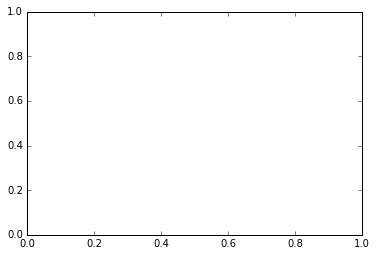

In [29]:
plt.plot(dfnew)
# plt.bar(range(len(dfnew[u'count'])), dfnew[u'count'] , width=0.7, bottom=dfnew[u'word'])